<h1>Prediction Using Supervised Machine Learning</h1>

<h2>Importing The Required Modules</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

<h2>Loading The Dataset</h1>

In [2]:
data = pd.read_csv("F:\\spark\\dataset\\score.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h2>Plotting The Data Points</h2>

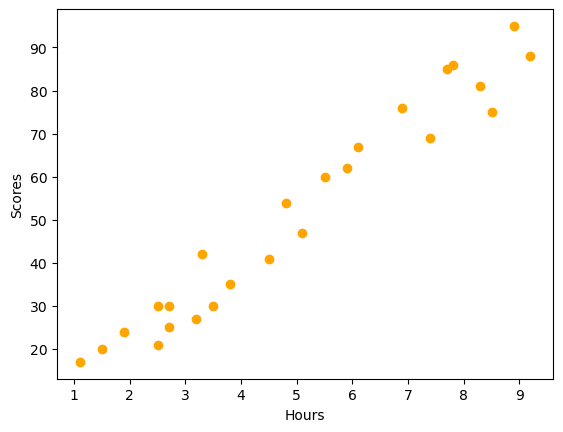

In [5]:
x = data['Hours'].values
y = data['Scores'].values
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x, y, c='orange')
plt.show()

<h2>Preprocessing The Data</h2>

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<h2>Linear Regression Plot Function</h2>

In [8]:
def regression_plot(x, y, model, title=""):
    plt.figure(figsize=(15,9))
    plt.title(title)
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.xlim(0,10)
    plt.ylim(10, 100)
    
    x_line = np.array([np.min(x) - 100, np.max(x) + 100]).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.scatter(x, y, c='blue', label='Original Points')
    plt.plot(x_line, y_line, linewidth=4, c='yellow', label='Predicted Line')
    plt.legend()
    plt.show()

<h2>Training The Data</h2>

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

<h2>Fitting The Best Fit Line</h2>

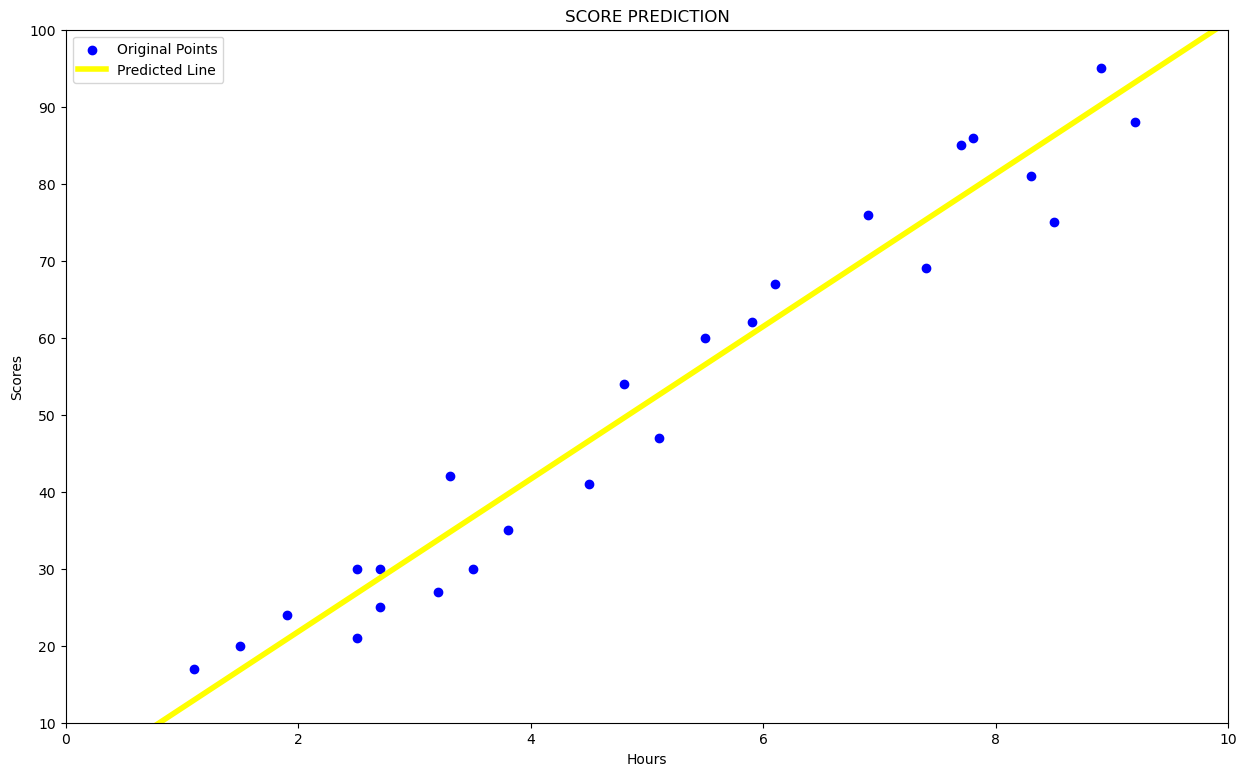

In [10]:
regression_plot(x, y, linear_model, title = "SCORE PREDICTION")

<h2>Plotting Training Set</h2>

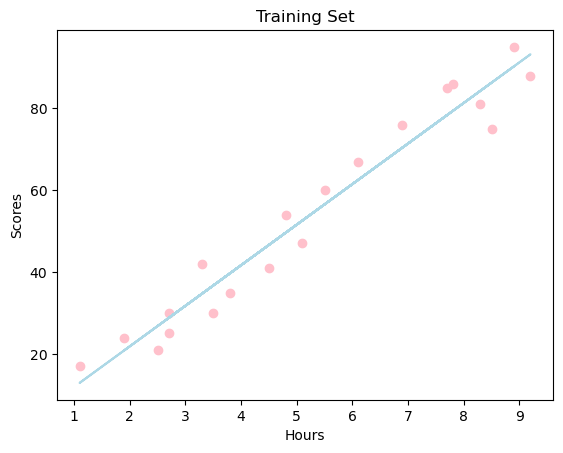

In [11]:
plt.scatter(X_train, y_train, c='pink')
plt.plot(X_train, linear_model.predict(X_train), c='lightblue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Training Set")
plt.show()

<h2>Plotting Testing Set</h2>

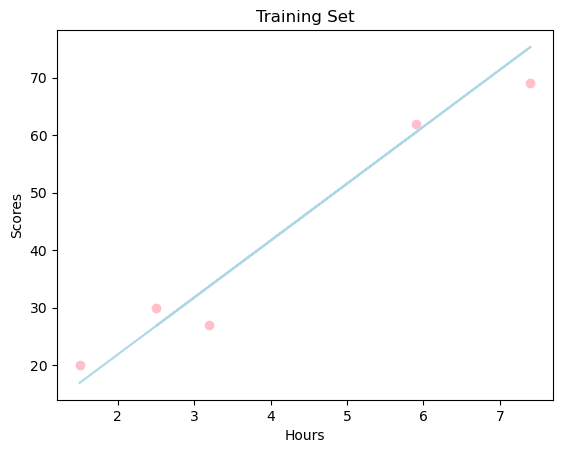

In [12]:
plt.scatter(X_test, y_test, c='pink')
plt.plot(X_test, linear_model.predict(X_test), c='lightblue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Training Set")
plt.show()

<h2>Actual Points vs Predicted Points</h2>

In [13]:
y_pred = linear_model.predict(X_test)
new_data = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
new_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<h2>Evaluation Using Root Mean Squared Error</h2>

In [14]:
mean_sqaured_error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mean_sqaured_error}")

Mean Squared Error: 4.6474476121003665


<h2>Predicted Score For Studying After 9.25 Hours</h2>

In [15]:
# change the number into 2D array
my_study_hours = [[9.25]]
print(f"After 9.25 hours studying, my score is: {round(linear_model.predict(my_study_hours)[0],2)}")

After 9.25 hours studying, my score is: 93.69


<h2>After Studying For 9.25 Hours I can Earn 93% Score.</h2>